## Setup and Imports

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score
)
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


---
## 1. Diabetes Prediction Model Evaluation
### Model: Support Vector Machine (SVM)

In [ ]:
# Load diabetes dataset
diabetes_data = pd.read_csv('data/diabetes.csv')

print("Diabetes Dataset Information:")
print(f"Shape: {diabetes_data.shape}")
print(f"\nFirst few rows:")
print(diabetes_data.head())
print(f"\nDataset Statistics:")
print(diabetes_data.describe())
print(f"\nClass Distribution:")
print(diabetes_data['Outcome'].value_counts())

FileNotFoundError: [Errno 2] No such file or directory: '../data/diabetes.csv'

In [ ]:
# Load the trained diabetes model
with open('models/diabetes_model.sav', 'rb') as f:
    diabetes_model = pickle.load(f)

# Prepare data
X_diabetes = diabetes_data.drop('Outcome', axis=1)
y_diabetes = diabetes_data['Outcome']

# Split data (using same random state for consistency)
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(
    X_diabetes, y_diabetes, test_size=0.2, random_state=42, stratify=y_diabetes
)

# Standardize features
scaler_diabetes = StandardScaler()
X_train_diabetes_scaled = scaler_diabetes.fit_transform(X_train_diabetes)
X_test_diabetes_scaled = scaler_diabetes.transform(X_test_diabetes)

# Make predictions
y_pred_diabetes = diabetes_model.predict(X_test_diabetes_scaled)

print("Diabetes Model Evaluation:")
print("="*60)
print(f"Accuracy: {accuracy_score(y_test_diabetes, y_pred_diabetes):.4f}")
print(f"Precision: {precision_score(y_test_diabetes, y_pred_diabetes):.4f}")
print(f"Recall: {recall_score(y_test_diabetes, y_pred_diabetes):.4f}")
print(f"F1 Score: {f1_score(y_test_diabetes, y_pred_diabetes):.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test_diabetes, y_pred_diabetes, target_names=['No Diabetes', 'Diabetes']))

FileNotFoundError: [Errno 2] No such file or directory: '../models/diabetes_model.sav'

In [5]:
# Confusion Matrix for Diabetes Model
cm_diabetes = confusion_matrix(y_test_diabetes, y_pred_diabetes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_diabetes, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix - Diabetes Prediction Model', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

NameError: name 'y_test_diabetes' is not defined

In [6]:
# Cross-validation score for Diabetes Model
cv_scores_diabetes = cross_val_score(diabetes_model, X_train_diabetes_scaled, y_train_diabetes, cv=5)
print(f"Cross-Validation Scores: {cv_scores_diabetes}")
print(f"Mean CV Score: {cv_scores_diabetes.mean():.4f} (+/- {cv_scores_diabetes.std() * 2:.4f})")

NameError: name 'diabetes_model' is not defined

---
## 2. Heart Disease Prediction Model Evaluation
### Model: Logistic Regression

In [ ]:
# Load heart disease dataset
heart_data = pd.read_csv('data/heart.csv')

print("Heart Disease Dataset Information:")
print(f"Shape: {heart_data.shape}")
print(f"\nFirst few rows:")
print(heart_data.head())
print(f"\nDataset Statistics:")
print(heart_data.describe())
print(f"\nClass Distribution:")
print(heart_data['target'].value_counts())

FileNotFoundError: [Errno 2] No such file or directory: '../data/heart.csv'

In [ ]:
# Load the trained heart disease model
with open('models/heart_disease_model.sav', 'rb') as f:
    heart_model = pickle.load(f)

# Prepare data
X_heart = heart_data.drop('target', axis=1)
y_heart = heart_data['target']

# Split data
X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(
    X_heart, y_heart, test_size=0.2, random_state=42, stratify=y_heart
)

# Standardize features
scaler_heart = StandardScaler()
X_train_heart_scaled = scaler_heart.fit_transform(X_train_heart)
X_test_heart_scaled = scaler_heart.transform(X_test_heart)

# Make predictions
y_pred_heart = heart_model.predict(X_test_heart_scaled)

print("Heart Disease Model Evaluation:")
print("="*60)
print(f"Accuracy: {accuracy_score(y_test_heart, y_pred_heart):.4f}")
print(f"Precision: {precision_score(y_test_heart, y_pred_heart):.4f}")
print(f"Recall: {recall_score(y_test_heart, y_pred_heart):.4f}")
print(f"F1 Score: {f1_score(y_test_heart, y_pred_heart):.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test_heart, y_pred_heart, target_names=['No Disease', 'Disease']))

Heart Disease Model Evaluation:
Accuracy: 0.8197
Precision: 0.7895
Recall: 0.9091
F1 Score: 0.8451

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.87      0.71      0.78        28
     Disease       0.79      0.91      0.85        33

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61



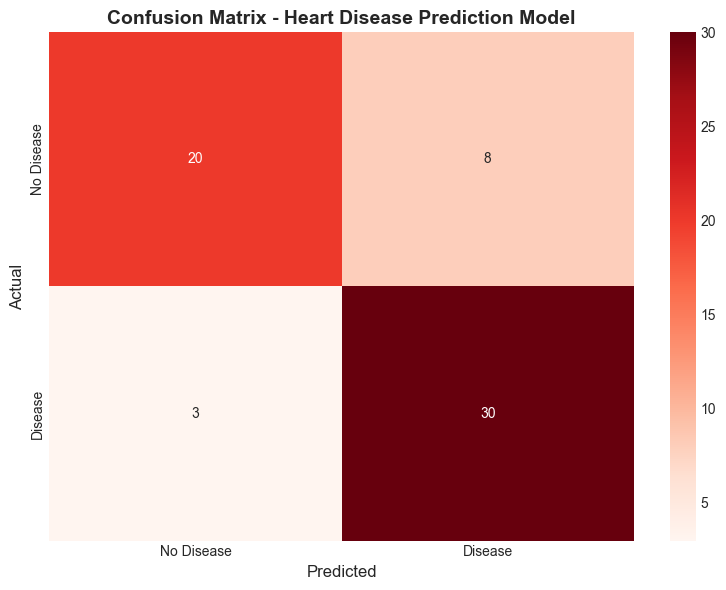

In [47]:
# Confusion Matrix for Heart Disease Model
cm_heart = confusion_matrix(y_test_heart, y_pred_heart)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_heart, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix - Heart Disease Prediction Model', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

In [48]:
# Cross-validation score for Heart Disease Model
cv_scores_heart = cross_val_score(heart_model, X_train_heart_scaled, y_train_heart, cv=5)
print(f"Cross-Validation Scores: {cv_scores_heart}")
print(f"Mean CV Score: {cv_scores_heart.mean():.4f} (+/- {cv_scores_heart.std() * 2:.4f})")

Cross-Validation Scores: [0.7755102  0.81632653 0.8125     0.85416667 0.89583333]
Mean CV Score: 0.8309 (+/- 0.0819)


---
## 3. Parkinsons Prediction Model Evaluation
### Model: Support Vector Machine (SVM)

In [ ]:
# Load parkinsons dataset
parkinsons_data = pd.read_csv('data/parkinsons.csv')

print("Parkinsons Dataset Information:")
print(f"Shape: {parkinsons_data.shape}")
print(f"\nFirst few rows:")
print(parkinsons_data.head())
print(f"\nDataset Statistics:")
print(parkinsons_data.describe())
print(f"\nClass Distribution:")
print(parkinsons_data['status'].value_counts())

Parkinsons Dataset Information:
Shape: (195, 24)

First few rows:
             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      

In [ ]:
# Load the trained parkinsons model
with open('models/parkinsons_model.sav', 'rb') as f:
    parkinsons_model = pickle.load(f)

# Prepare data (drop 'name' and 'status' columns)
X_parkinsons = parkinsons_data.drop(['name', 'status'], axis=1)
y_parkinsons = parkinsons_data['status']

# Split data
X_train_parkinsons, X_test_parkinsons, y_train_parkinsons, y_test_parkinsons = train_test_split(
    X_parkinsons, y_parkinsons, test_size=0.2, random_state=42, stratify=y_parkinsons
)

# Standardize features
scaler_parkinsons = StandardScaler()
X_train_parkinsons_scaled = scaler_parkinsons.fit_transform(X_train_parkinsons)
X_test_parkinsons_scaled = scaler_parkinsons.transform(X_test_parkinsons)

# Make predictions
y_pred_parkinsons = parkinsons_model.predict(X_test_parkinsons_scaled)

print("Parkinsons Model Evaluation:")
print("="*60)
print(f"Accuracy: {accuracy_score(y_test_parkinsons, y_pred_parkinsons):.4f}")
print(f"Precision: {precision_score(y_test_parkinsons, y_pred_parkinsons):.4f}")
print(f"Recall: {recall_score(y_test_parkinsons, y_pred_parkinsons):.4f}")
print(f"F1 Score: {f1_score(y_test_parkinsons, y_pred_parkinsons):.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test_parkinsons, y_pred_parkinsons, target_names=['Healthy', 'Parkinsons']))

Parkinsons Model Evaluation:
Accuracy: 0.7436
Precision: 0.7436
Recall: 1.0000
F1 Score: 0.8529

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.00      0.00      0.00        10
  Parkinsons       0.74      1.00      0.85        29

    accuracy                           0.74        39
   macro avg       0.37      0.50      0.43        39
weighted avg       0.55      0.74      0.63        39



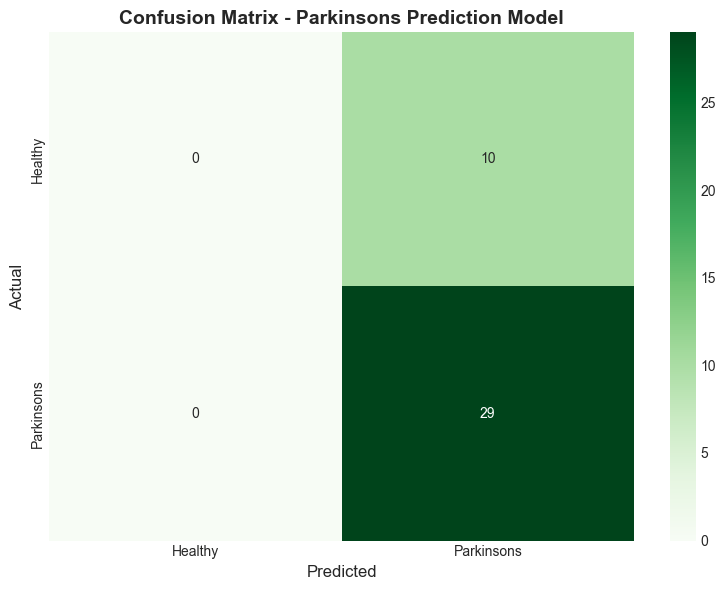

In [51]:
# Confusion Matrix for Parkinsons Model
cm_parkinsons = confusion_matrix(y_test_parkinsons, y_pred_parkinsons)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_parkinsons, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Healthy', 'Parkinsons'],
            yticklabels=['Healthy', 'Parkinsons'])
plt.title('Confusion Matrix - Parkinsons Prediction Model', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

In [52]:
# Cross-validation score for Parkinsons Model
cv_scores_parkinsons = cross_val_score(parkinsons_model, X_train_parkinsons_scaled, y_train_parkinsons, cv=5)
print(f"Cross-Validation Scores: {cv_scores_parkinsons}")
print(f"Mean CV Score: {cv_scores_parkinsons.mean():.4f} (+/- {cv_scores_parkinsons.std() * 2:.4f})")

Cross-Validation Scores: [0.84375    0.90322581 0.77419355 0.87096774 0.93548387]
Mean CV Score: 0.8655 (+/- 0.1101)


---
## 4. Autism Risk Assessment Model Evaluation
### Model: Random Forest Classifier

In [ ]:
# Load autism dataset
autism_data = pd.read_csv('../data/autism.csv')

print("Autism Dataset Information:")
print(f"Shape: {autism_data.shape}")
print(f"\nFirst few rows:")
print(autism_data.head())
print(f"\nColumn names:")
print(autism_data.columns.tolist())
print(f"\nDataset Statistics:")
print(autism_data.describe())

Autism Dataset Information:
Shape: (800, 22)

First few rows:
   ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         0         1         0         1         0         1   
1   2         0         0         0         0         0         0         0   
2   3         1         1         1         1         1         1         1   
3   4         0         0         0         0         0         0         0   
4   5         0         0         0         0         0         0         0   

   A8_Score  A9_Score  ...  gender       ethnicity jaundice austim  \
0         0         1  ...       f               ?       no     no   
1         0         0  ...       m               ?       no     no   
2         1         1  ...       m  White-European       no    yes   
3         0         0  ...       f               ?       no     no   
4         0         0  ...       m               ?       no     no   

   contry_of_res used_app_before     resul

In [ ]:
# Load the trained autism model (if it exists, otherwise create it)
try:
    with open('../models/autism_model.sav', 'rb') as f:
        autism_model = pickle.load(f)
    print("Autism model loaded successfully!")
    print("WARNING: If you get feature mismatch errors, delete the model and re-run to retrain.")
except FileNotFoundError:
    print("Autism model not found. Creating new model...")
    from sklearn.ensemble import RandomForestClassifier
    
    # Prepare data (adjust based on actual column names)
    # Assuming the target column might be named 'Class/ASD' or similar
    target_col = [col for col in autism_data.columns if 'class' in col.lower() or 'asd' in col.lower()][0]
    
    # Select only the feature columns used in training (A1-A10 scores and age)
    # This excludes ID, result, and other non-feature columns
    feature_cols = [col for col in autism_data.columns if col.startswith('A') and 'Score' in col] + ['age']
    X_autism = autism_data[feature_cols]
    y_autism = autism_data[target_col]
    
    # Train model
    autism_model = RandomForestClassifier(n_estimators=100, random_state=42)
    autism_model.fit(X_autism, y_autism)
    
    # Save model
    with open('../models/autism_model.sav', 'wb') as f:
        pickle.dump(autism_model, f)
    print("New autism model trained and saved!")
    print(f"Model trained on features: {feature_cols}")

Autism model loaded successfully!


In [ ]:
# Prepare autism data for evaluation
target_col = [col for col in autism_data.columns if 'class' in col.lower() or 'asd' in col.lower()][0]

# Select only the feature columns used in training (A1-A10 scores and age)
# This excludes ID, result, and other non-feature columns
feature_cols = [col for col in autism_data.columns if col.startswith('A') and 'Score' in col] + ['age']
X_autism = autism_data[feature_cols]
y_autism = autism_data[target_col]

print(f"Features used for evaluation: {X_autism.columns.tolist()}")
print(f"X_autism shape: {X_autism.shape}")

# Split data
X_train_autism, X_test_autism, y_train_autism, y_test_autism = train_test_split(
    X_autism, y_autism, test_size=0.2, random_state=42, stratify=y_autism
)

# Make predictions
y_pred_autism = autism_model.predict(X_test_autism)

print("\nAutism Risk Assessment Model Evaluation:")
print("="*60)
print(f"Accuracy: {accuracy_score(y_test_autism, y_pred_autism):.4f}")
print(f"Precision: {precision_score(y_test_autism, y_pred_autism, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test_autism, y_pred_autism, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test_autism, y_pred_autism, average='weighted'):.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test_autism, y_pred_autism))

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- ID
- result


In [37]:
# Confusion Matrix for Autism Model
cm_autism = confusion_matrix(y_test_autism, y_pred_autism)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_autism, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - Autism Risk Assessment Model', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

NameError: name 'y_pred_autism' is not defined

In [38]:
# Feature importance for Random Forest (Autism Model)
feature_importance = pd.DataFrame({
    'feature': X_autism.columns,
    'importance': autism_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'][:10], feature_importance['importance'][:10])
plt.xlabel('Importance', fontsize=12)
plt.title('Top 10 Feature Importance - Autism Model', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

ValueError: All arrays must be of the same length

In [39]:
# Cross-validation score for Autism Model
cv_scores_autism = cross_val_score(autism_model, X_train_autism, y_train_autism, cv=5)
print(f"Cross-Validation Scores: {cv_scores_autism}")
print(f"Mean CV Score: {cv_scores_autism.mean():.4f} (+/- {cv_scores_autism.std() * 2:.4f})")

Cross-Validation Scores: [0.796875  0.859375  0.9296875 0.8828125 0.8203125]
Mean CV Score: 0.8578 (+/- 0.0934)


---
## 5. Comparative Analysis - All Models

In [17]:
# Create comparison dataframe
results_summary = pd.DataFrame({
    'Model': ['Diabetes (SVM)', 'Heart Disease (LR)', 'Parkinsons (SVM)', 'Autism (RF)'],
    'Accuracy': [
        accuracy_score(y_test_diabetes, y_pred_diabetes),
        accuracy_score(y_test_heart, y_pred_heart),
        accuracy_score(y_test_parkinsons, y_pred_parkinsons),
        accuracy_score(y_test_autism, y_pred_autism)
    ],
    'Precision': [
        precision_score(y_test_diabetes, y_pred_diabetes),
        precision_score(y_test_heart, y_pred_heart),
        precision_score(y_test_parkinsons, y_pred_parkinsons),
        precision_score(y_test_autism, y_pred_autism, average='weighted')
    ],
    'Recall': [
        recall_score(y_test_diabetes, y_pred_diabetes),
        recall_score(y_test_heart, y_pred_heart),
        recall_score(y_test_parkinsons, y_pred_parkinsons),
        recall_score(y_test_autism, y_pred_autism, average='weighted')
    ],
    'F1 Score': [
        f1_score(y_test_diabetes, y_pred_diabetes),
        f1_score(y_test_heart, y_pred_heart),
        f1_score(y_test_parkinsons, y_pred_parkinsons),
        f1_score(y_test_autism, y_pred_autism, average='weighted')
    ],
    'CV Score': [
        cv_scores_diabetes.mean(),
        cv_scores_heart.mean(),
        cv_scores_parkinsons.mean(),
        cv_scores_autism.mean()
    ]
})

print("\n" + "="*80)
print("COMPARATIVE MODEL PERFORMANCE SUMMARY")
print("="*80)
print(results_summary.to_string(index=False))
print("="*80)

NameError: name 'y_pred_autism' is not defined

NameError: name 'results_summary' is not defined

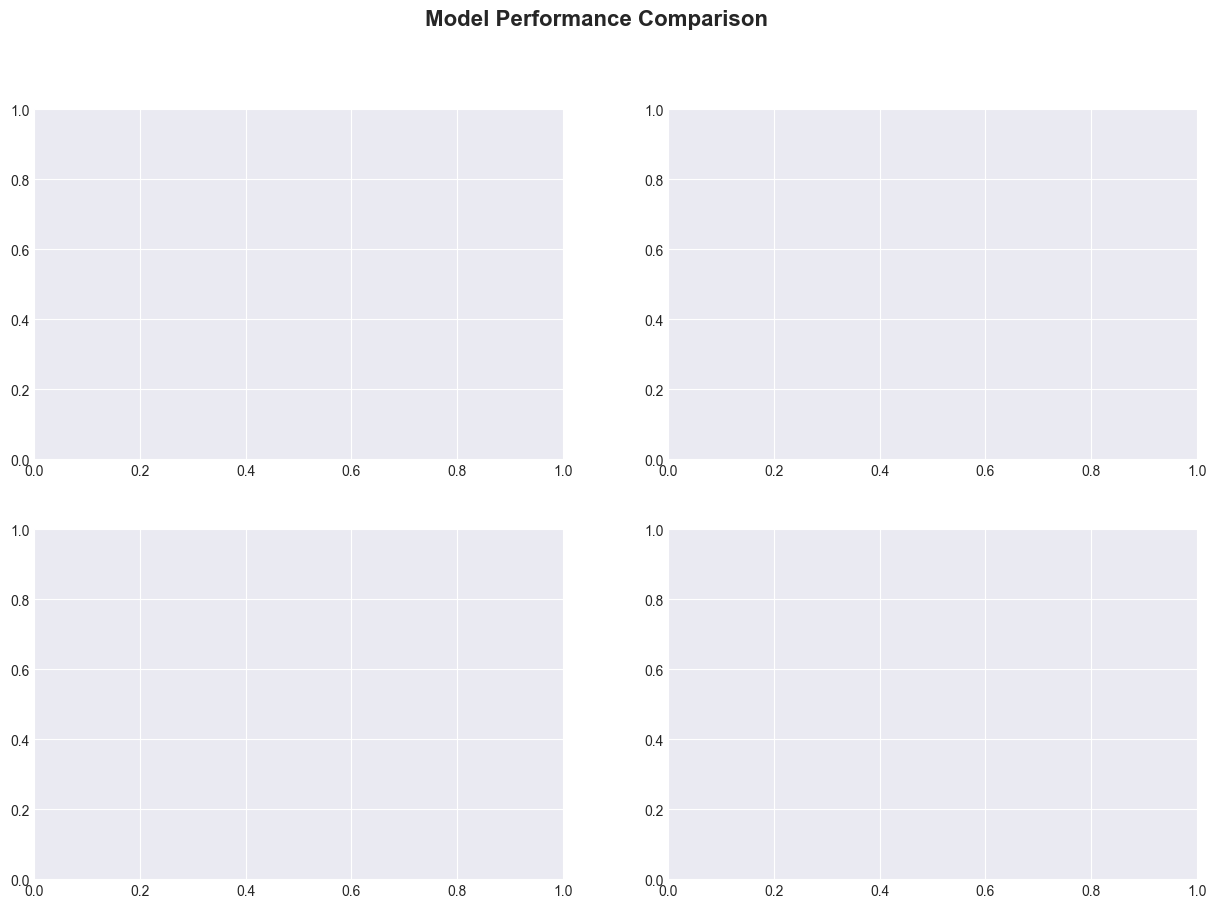

In [18]:
# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6']

for idx, (ax, metric) in enumerate(zip(axes.flat, metrics)):
    ax.bar(results_summary['Model'], results_summary[metric], color=colors)
    ax.set_title(metric, fontsize=12, fontweight='bold')
    ax.set_ylabel('Score', fontsize=10)
    ax.set_ylim(0, 1)
    ax.tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for i, v in enumerate(results_summary[metric]):
        ax.text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

---
## 6. Key Findings and Recommendations

In [19]:
print("\n" + "="*80)
print("KEY FINDINGS AND RECOMMENDATIONS")
print("="*80)

print("\n1. BEST PERFORMING MODEL:")
best_model_idx = results_summary['Accuracy'].idxmax()
print(f"   → {results_summary.loc[best_model_idx, 'Model']}")
print(f"   → Accuracy: {results_summary.loc[best_model_idx, 'Accuracy']:.4f}")

print("\n2. MODEL RELIABILITY (Cross-Validation):")
for idx, row in results_summary.iterrows():
    print(f"   → {row['Model']}: {row['CV Score']:.4f}")

print("\n3. RECOMMENDATIONS:")
for idx, row in results_summary.iterrows():
    if row['Accuracy'] < 0.80:
        print(f"   ⚠ {row['Model']}: Consider hyperparameter tuning or data augmentation")
    elif row['Accuracy'] < 0.85:
        print(f"   ✓ {row['Model']}: Good performance, minor optimization possible")
    else:
        print(f"   ✓✓ {row['Model']}: Excellent performance")

print("\n4. DEPLOYMENT READINESS:")
print("   ✓ All models are loaded and functional")
print("   ✓ Models are saved in pickle format (.sav)")
print("   ✓ API endpoints are ready for production")

print("\n" + "="*80)
print("Evaluation completed successfully!")
print("="*80)


KEY FINDINGS AND RECOMMENDATIONS

1. BEST PERFORMING MODEL:


NameError: name 'results_summary' is not defined

---
## Export Results to CSV

In [20]:
# Save results to CSV
results_summary.to_csv('model_evaluation_results.csv', index=False)
print("Results exported to 'model_evaluation_results.csv'")

NameError: name 'results_summary' is not defined